In [61]:
import pandas as pd
# ingest the data
data=pd.read_csv(r"C:\DimondPricePrediction\notebooks\gemestone.csv")



In [62]:
# EDA - Exploratory data analysis
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [63]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
19793,19794,1.18,Premium,I,SI2,60.8,58.0,6.84,6.78,4.14,4579
9223,9224,1.05,Ideal,G,VVS2,60.4,54.0,6.60,6.65,4.00,9000
2894,2895,1.00,Very Good,F,VS2,62.8,57.0,6.29,6.35,3.97,6957
11984,11985,1.01,Very Good,I,SI1,63.2,54.0,6.41,6.35,4.03,4525
24331,24332,0.32,Very Good,F,VVS1,62.2,55.0,4.39,4.43,2.74,886


In [64]:
# Missing the values
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [65]:
import numpy as np
# here i find the mean of the depth
depth_mean=data['depth'].mean()

In [66]:
# fill missing values in the depth column with mean value
data["depth"].fillna(depth_mean,inplace=True)

In [67]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [68]:
# check the null values
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [70]:
# check the duplicate values
data.duplicated().sum()

0

In [71]:
# check the size of the data
data.shape

(26967, 11)

In [72]:
# anaylsis data with univariage and multivariate analysis
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [73]:
categorical_data=data.columns[data.dtypes=='object']

In [74]:
numerical_data=data.columns[data.dtypes!='object']

In [75]:
# getting only categorical columns
data[categorical_data].describe()

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [76]:
# getting numrical data
data[numerical_data].describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [77]:
# checking the values count of categorical columns
data[categorical_data].value_counts()

cut    color  clarity
Ideal  E      VS2        549
       G      VS1        477
              VS2        468
       F      VS2        444
       D      VS2        439
                        ... 
Fair   D      VVS1         1
Good   H      IF           1
       I      IF           1
       J      VVS1         1
Fair   D      I1           1
Name: count, Length: 275, dtype: int64

In [78]:
# checking each category value count
data[categorical_data]['cut'].value_counts()


cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [79]:
data[categorical_data]['clarity'].value_counts()


clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

In [80]:
data[categorical_data]['color'].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

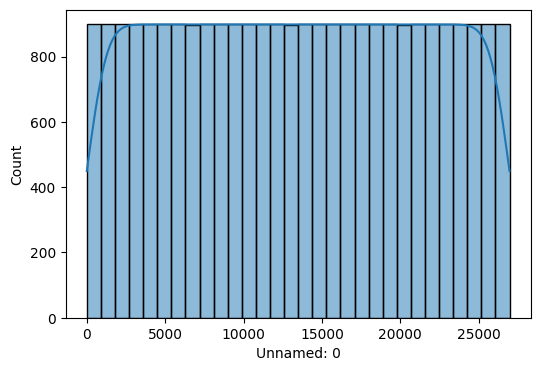

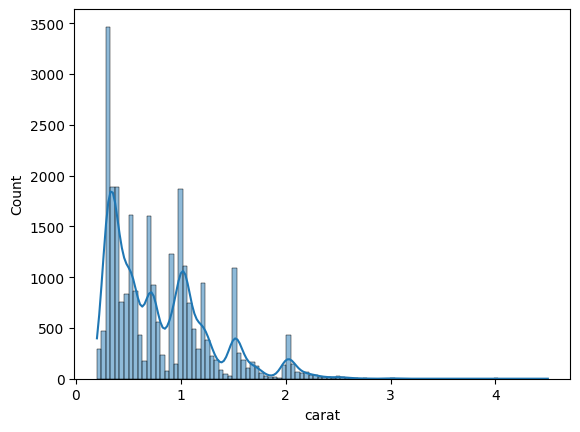

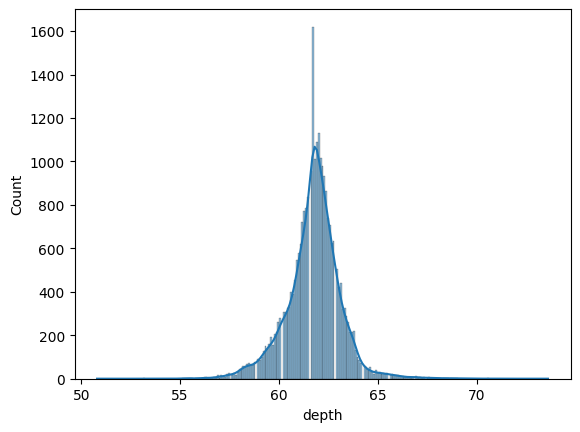

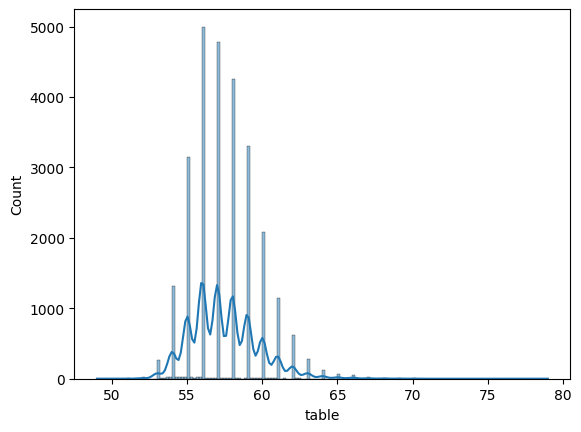

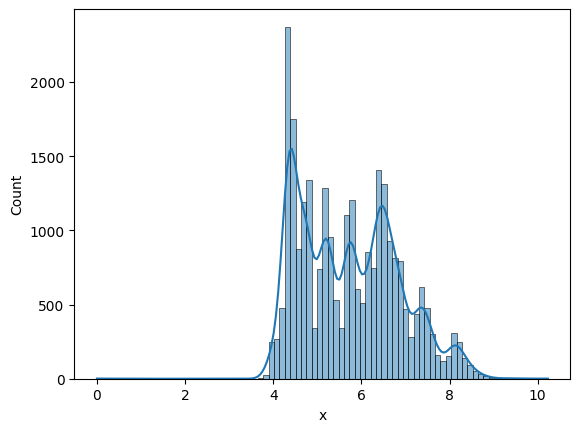

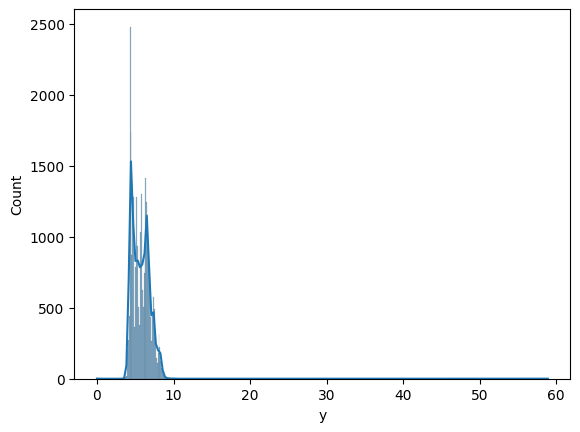

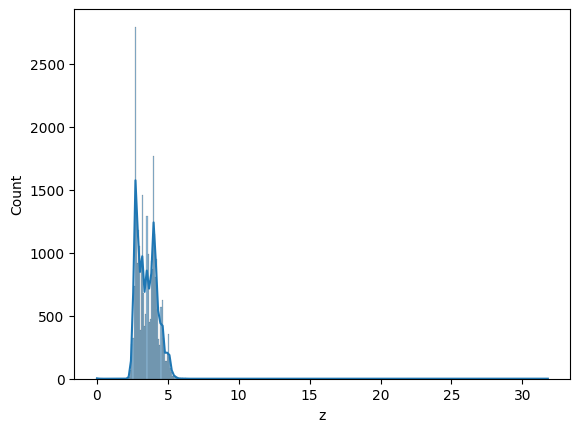

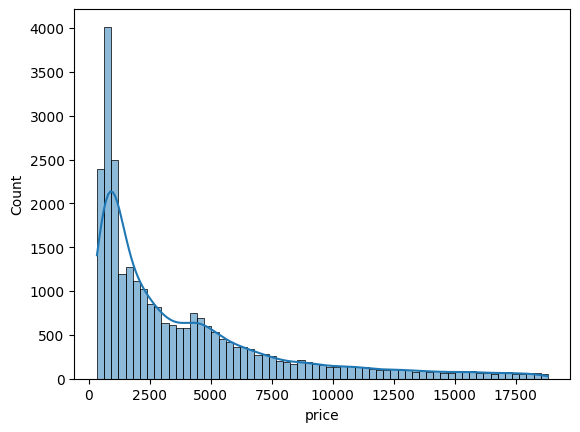

In [81]:
# data visulization 
# Numerical  data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in numerical_data:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

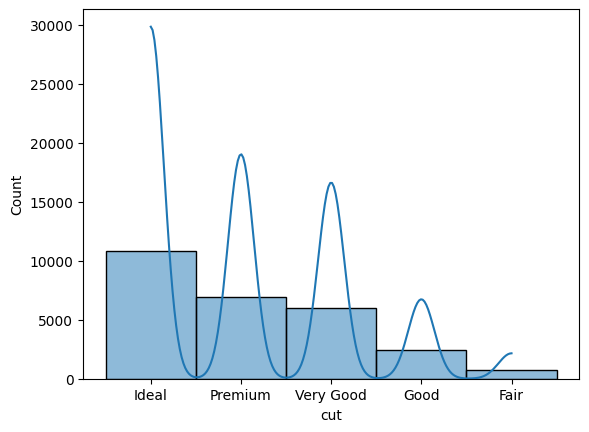

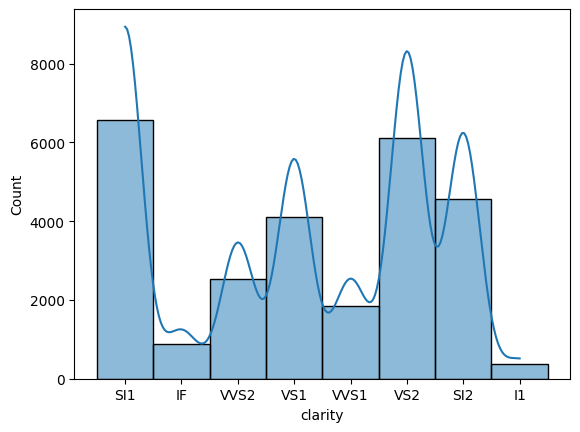

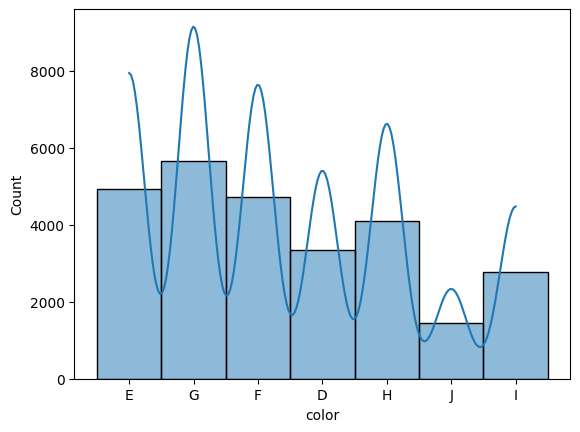

In [82]:
# plot the graph  for categorical columns
categorical_columns=['cut','clarity','color']
for col in categorical_columns:
    # checking the column
    if col in data.columns:
        value_counts=data[col].value_counts()
        sns.histplot(data=data,x=col,kde=True)
        print("\n")
        plt.show()
        
    

<Axes: >

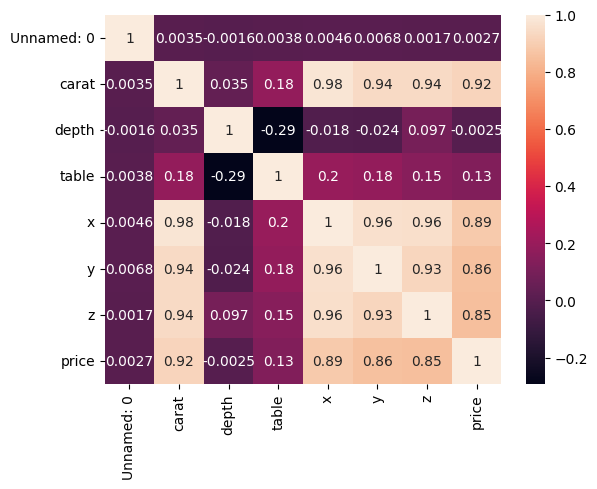

In [83]:
# statistical analysis
sns.heatmap(data[numerical_data].corr(),annot=True)

In [84]:
# feature Engneering
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [85]:
# Encoding 

# convert the categorical data into numrical data
data['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [86]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [87]:
data['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [88]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [89]:
data['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [90]:
clarity_map={'I1':1,'SI2':2,'SI3':3,'VS2':4,'VS1':5,'VVS1':6,'IF':7}

In [91]:
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [92]:
data['cut']=data['cut'].map(cut_map)
data['clarity']=data['clarity'].map(clarity_map)
data['clor']=data['color'].map(color_map)

In [93]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price,clor
0,1,0.30,5,E,NaN,62.1,58.0,4.27,4.29,2.66,499,2
1,2,0.33,4,G,7.0,60.8,58.0,4.42,4.46,2.70,984,4
2,3,0.90,3,E,NaN,62.2,60.0,6.04,6.12,3.78,6289,2
3,4,0.42,5,F,5.0,61.6,56.0,4.82,4.80,2.96,1082,3
4,5,0.31,5,F,6.0,60.4,59.0,4.35,4.43,2.65,779,3
